In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [68]:
df1 = pd.read_csv("/content/cancer_data.csv")

# **Cancer Data**

## **TextPre**

In [72]:
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [71]:
df1.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [73]:
df1.nunique()

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [78]:
df1 = df1.drop('id', axis=1)

In [79]:
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [80]:
le = LabelEncoder()
df1['diagnosis'] = le.fit_transform(df1['diagnosis'])

In [81]:
df1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [82]:
scaler = StandardScaler()
x = df1.drop('diagnosis', axis=1)
y = df1['diagnosis']
df_scaled = scaler.fit_transform(x)

In [83]:
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3, random_state=42)

## **Decision Tree**

In [108]:
dt_1_can = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt_1_can.fit(X_train, y_train)
y_pred_dt_1_can = dt_1_can.predict(X_test)
acc_dt_1_can = accuracy_score(y_test, y_pred_dt_1_can)

In [92]:
dt_2_can = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
dt_2_can.fit(X_train, y_train)
y_pred_dt_2_can = dt_2_can.predict(X_test)
acc_dt_2_can = accuracy_score(y_test, y_pred_dt_2_can)

In [93]:
dt_3_can = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=42)
dt_3_can.fit(X_train, y_train)
y_pred_dt_3_can = dt_3_can.predict(X_test)
acc_dt_3_can = accuracy_score(y_test, y_pred_dt_3_can)

In [109]:
print("max_depth=3, criterion='gini':", acc_dt_1_can)
print("max_depth=5, criterion='entropy':", acc_dt_2_can)
print("max_depth=None, criterion='gini':", acc_dt_3_can)

max_depth=3, criterion='gini': 0.9649122807017544
max_depth=5, criterion='entropy': 0.9532163742690059
max_depth=None, criterion='gini': 0.9415204678362573


## **Random Forest**

In [94]:
rf_1_can = RandomForestClassifier(n_estimators=50, max_depth=3, criterion='gini', random_state=42)
rf_1_can.fit(X_train, y_train)
y_pred_rf_1_can = rf_1_can.predict(X_test)
acc_rf_1_can = accuracy_score(y_test, y_pred_rf_1_can)

In [95]:
rf_2_can = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy', random_state=42)
rf_2_can.fit(X_train, y_train)
y_pred_rf_2_can = rf_2_can.predict(X_test)
acc_rf_2_can = accuracy_score(y_test, y_pred_rf_2_can)

In [96]:
rf_3_can = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', random_state=42)
rf_3_can.fit(X_train, y_train)
y_pred_rf_3_can = rf_3_can.predict(X_test)
acc_rf_3_can = accuracy_score(y_test, y_pred_rf_3_can)

In [97]:
print("n_estimators=50, max_depth=3, criterion='gini':", acc_rf_1_can)
print("n_estimators=100, max_depth=5, criterion='entropy':", acc_rf_2_can)
print("n_estimators=200, max_depth=None, criterion='gini':", acc_rf_3_can)

n_estimators=50, max_depth=3, criterion='gini': 0.9707602339181286
n_estimators=100, max_depth=5, criterion='entropy': 0.9707602339181286
n_estimators=200, max_depth=None, criterion='gini': 0.9707602339181286


## **Gaussian NB**

In [98]:
nb_1_can = GaussianNB(var_smoothing=0.0000000001)
nb_1_can.fit(X_train, y_train)
y_pred_nb_1_can = nb_1_can.predict(X_test)
acc_nb_1_can = accuracy_score(y_test, y_pred_nb_1_can)

In [101]:
nb_2_can = GaussianNB(var_smoothing=0.00000001)
nb_2_can.fit(X_train, y_train)
y_pred_nb_2_can = nb_2_can.predict(X_test)
acc_nb_2_can = accuracy_score(y_test, y_pred_nb_2_can)

In [102]:
nb_3_can = GaussianNB(var_smoothing=0.000001)
nb_3_can.fit(X_train, y_train)
y_pred_nb_3_can = nb_3_can.predict(X_test)
acc_nb_3_can = accuracy_score(y_test, y_pred_nb_3_can)

In [104]:
print("var_smoothing=0.0000000001:", acc_nb_1_can)
print("var_smoothing=0.00000001:", acc_nb_2_can)
print("var_smoothing=0.000001:", acc_nb_3_can)

var_smoothing=0.0000000001: 0.935672514619883
var_smoothing=0.00000001: 0.935672514619883
var_smoothing=0.000001: 0.935672514619883


## **Graph**

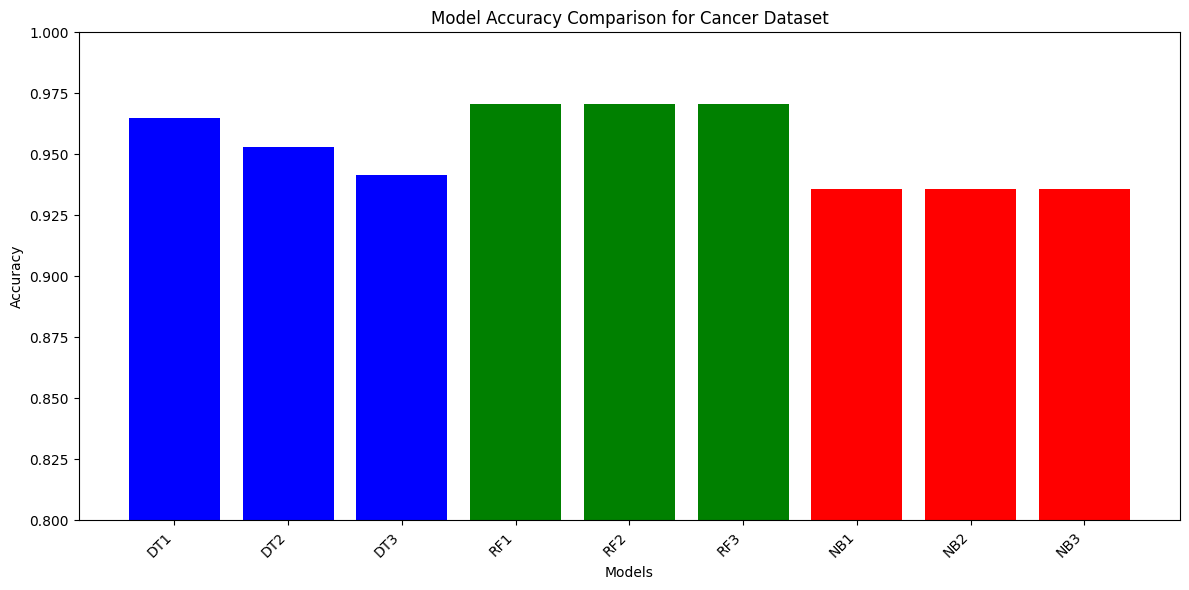

In [106]:
model_names = ['DT1', 'DT2', 'DT3', 'RF1', 'RF2', 'RF3', 'NB1', 'NB2', 'NB3']
accuracies = [acc_dt_1_can, acc_dt_2_can, acc_dt_3_can, acc_rf_1_can, acc_rf_2_can, acc_rf_3_can, acc_nb_1_can, acc_nb_2_can, acc_nb_3_can]  # Updated accuracies

plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['blue', 'blue', 'blue', 'green', 'green', 'green', 'red', 'red', 'red'])
plt.title('Model Accuracy Comparison for Cancer Dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()